# AI BOT FOR MEDICINE - Cancer

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

## Directories For the Datasets

In [2]:
train = r"C:\Users\thangaperumale\Downloads\Cancer-Ct scan\train"
test = r"C:\Users\thangaperumale\Downloads\Cancer-Ct scan\test"
validation = r"C:\Users\thangaperumale\Downloads\Cancer-Ct scan\valid"

## Setting Parameters

In [3]:
IMAGE_SIZE = (350, 350)
batch_size = 8
OUTPUT_SIZE = 1 

## Data Preparation For Training, Validation and Testing

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

## Train, Validation and Test Generators

In [5]:
# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='binary'  # binary class mode
)

# Create the validation data generator
validation_generator = test_datagen.flow_from_directory(
    validation,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='binary'
)
# Create the validation data generator
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='binary'
)

Found 263 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


Found 105 images belonging to 2 classes.


In [6]:
print("Class indices:", train_generator.class_indices)


Class indices: {'cancer': 0, 'normal': 1}


In [7]:
# Set up callbacks
#learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience=5, factor=0.5, min_lr=0.000001, verbose=2)
#early_stops = EarlyStopping(monitor='loss', patience=6, verbose=2)
#checkpointer = ModelCheckpoint(filepath='best_model.weights.h5', save_best_only=True, save_weights_only=True, verbose=2)


## Building the CNN Model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(OUTPUT_SIZE, activation='sigmoid')  # Sigmoid for binary classification
])


## Compile and Train the Model

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    #callbacks=[learning_rate_reduction, early_stops, checkpointer]
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8705 - loss: 21.8082 - val_accuracy: 0.4688 - val_loss: 29.1033
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7500 - loss: 5.8671 - val_accuracy: 0.5000 - val_loss: 4.3135
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8941 - loss: 14.4793 - val_accuracy: 1.0000 - val_loss: 5.9955e-21
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 255.0437
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9696 - loss: 4.1539 - val_accuracy: 0.9688 - val_loss: 4.1141
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 3.2208e-19 - val_accuracy: 0.5000 - val_loss: 133.1933
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9246 - loss: 8.2503 - val_accuracy: 0.9375 - val_loss: 5.8928
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 30.3413 - val_accuracy

## Evaluation of the Model on the Test Set

In [13]:
# Evaluate the model on the test set to get test accuracy
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - accuracy: 0.9843 - loss: 0.0156

Test Accuracy: 99.04%


## Save the trained model

In [14]:
# Save the trained model
model.save('trained_lung_cancer_model.h5')

## Plotting the Training History And Load New Image To Check Whether it is Pneumonia or Not

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
The image belongs to class: normal


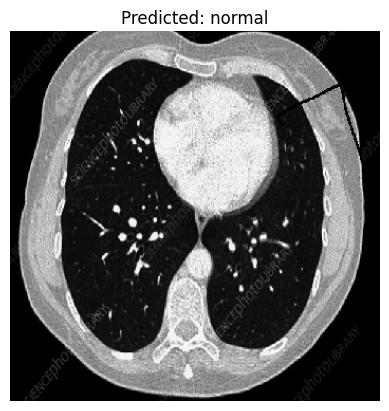

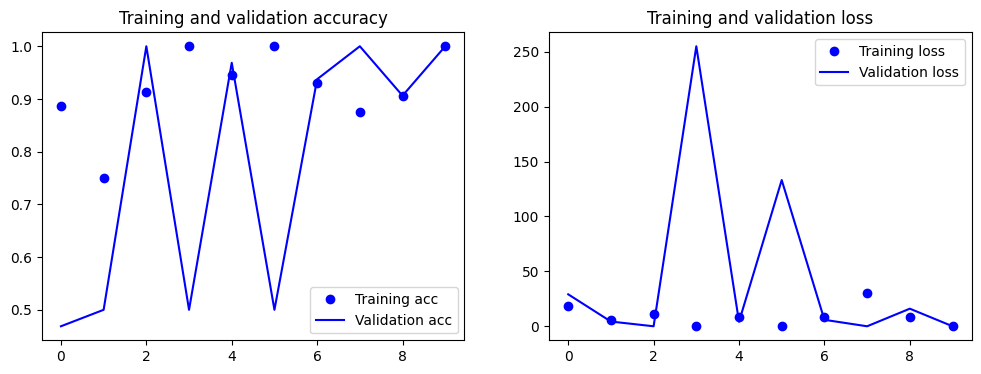

In [15]:
# Function to load and preprocess an image for prediction
def load_and_preprocess_image(img_path, target_size):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

# Predict a sample image
img_path = r"C:\Users\thangaperumale\Downloads\Cancer-Ct scan\valid\normal\6 - Copy (2) - Copy.png"
img = load_and_preprocess_image(img_path, IMAGE_SIZE)
prediction = model.predict(img)
predicted_label = 'normal' if prediction[0][0] > 0.7 else 'cancer'

print(f"The image belongs to class: {predicted_label}")

# Display the image with predicted class
plt.imshow(load_img(img_path, target_size=IMAGE_SIZE))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Plot training and validation accuracy and loss
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training(history)